# Finding Heavy Traffic Indicators on I-94

- In this project, we will be analysing the I-94 Traffic dataset which is about the westbound traffic that is present in the I-94 interstate highway.
- The goal of the analysis as well as visualization of the dataset is to determine a few indicators of heavy traffic on the highway.
- The indicators typically can be time of the day,weather or time of the week,etc.

#### ~ By Alessa Ingole

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


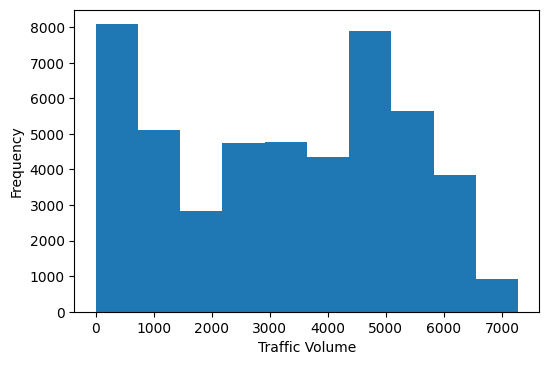

In [3]:
%matplotlib inline
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [4]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
traffic['traffic_volume'].value_counts()

356     50
353     50
340     47
351     44
369     42
        ..
5091     1
2156     1
2252     1
205      1
7150     1
Name: traffic_volume, Length: 6704, dtype: int64

In [6]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])
import datetime as dt
traffic['hour']=traffic['date_time'].dt.hour

In [7]:
traffic['hour'].head()

0     9
1    10
2    11
3    12
4    13
Name: hour, dtype: int64

In [8]:
bool1=(traffic['hour']>=7) & (traffic['hour']<19)
bool2=(traffic['hour']>=19) | (traffic['hour']<7)
day_time=traffic[bool1]
night_time=traffic[bool2]

In [9]:
print(day_time.shape)
print(night_time.shape)

(23877, 10)
(24327, 10)


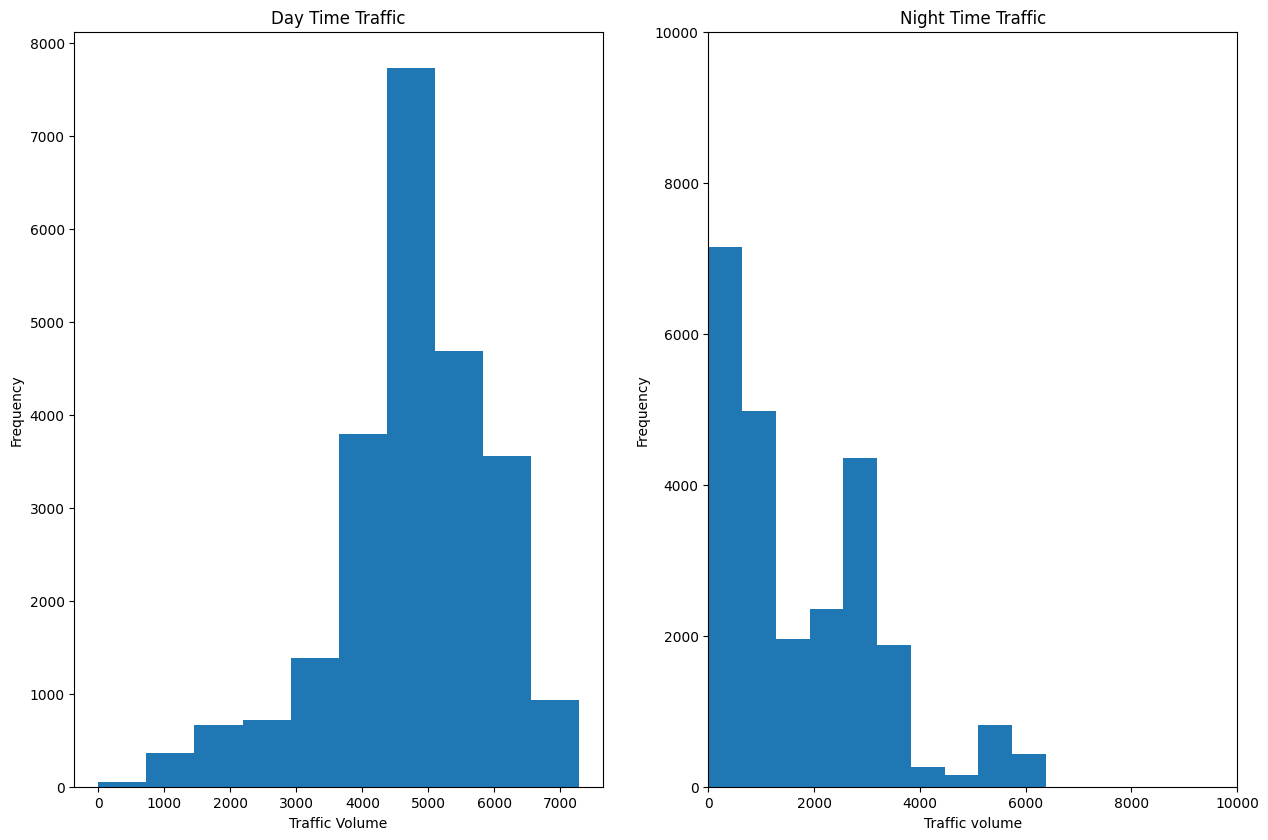

In [10]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
day_time['traffic_volume'].plot.hist()
plt.title('Day Time Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
night_time['traffic_volume'].plot.hist()
plt.title('Night Time Traffic')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')

plt.ylim(0,10000)
plt.xlim(0,10000)
plt.show()

#### The day-time traffic has a normal distribution while the night-time traffic has a right-skewed distribution. 
Traffic is more during the daytime and very much less in the nighttime,as we can see above.
Since our goal is focused towards heavy traffic only, we would be focusing on the day-time traffic.

In [11]:
day_time['month']=day_time['date_time'].dt.month
by_month=day_time.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-11-aa919bbf5c91>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

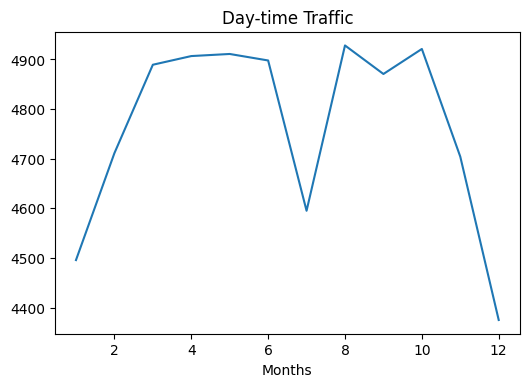

In [12]:
by_month['traffic_volume'].plot.line()
plt.title('Day-time Traffic')
plt.xlabel('Months')
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. 

In [13]:
day_time['dayofweek']=day_time['date_time'].dt.dayofweek
by_dayofweek=day_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-13-5cdca22900ae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

- 0 is Monday
- 1 is Tuesday
- 2 is Wednesday
- 3 is Thursday
- 4 is Friday
- 5 is Saturday
- 6 is Sunday

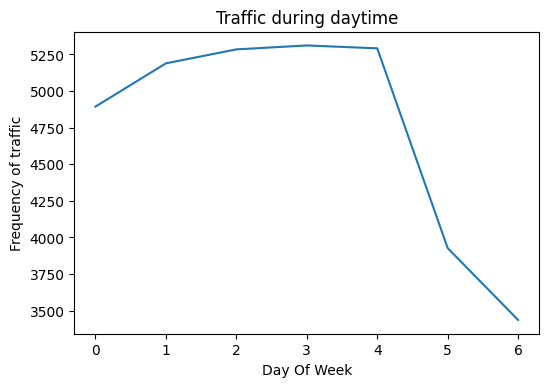

In [14]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic during daytime')
plt.xlabel('Day Of Week')
plt.ylabel('Frequency of traffic')
plt.show()

As seen above, business days have more traffic which decreases steeply from Friday.

We will now be generating a line plot for the time of day.
- We will be required to split the data based on 2 categories
1. Business day , 2. Weekend

In [15]:
day_time['hour']=day_time['date_time'].dt.hour
business_days=day_time.copy()[day_time['dayofweek']<=4]
weekend=day_time.copy()[day_time['dayofweek']>=5]

by_hour_business=business_days.groupby('hour').mean()
by_hour_weekend=weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-15-e4d5d1914ca2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



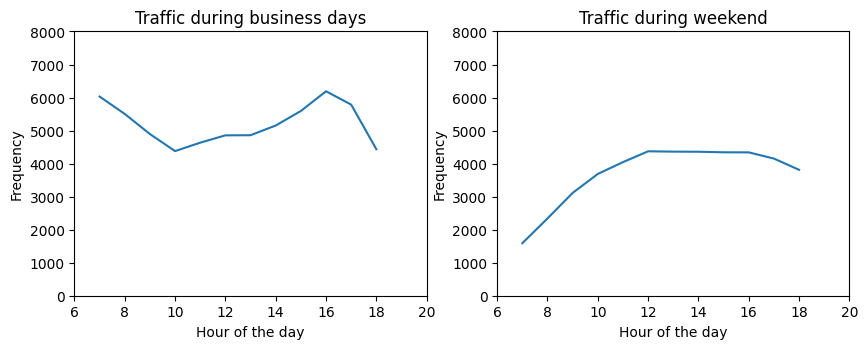

In [16]:
plt.figure(figsize=(10,3.5))
#plot 1
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic during business days')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.xlim(6,20)
plt.ylim(0,8000)

#plot2
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic during weekend')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.xlim(6,20)
plt.ylim(0,8000)

plt.show()

As we can see above:
- The rush hours during business days are from 7 am to 4pm 
- The rush hous during weekdays are comparitively less than the business days but they are during the time period between 10 am to 6 pm.

#### To summarize 
Regarding the time indicators on heavy traffic we found out that
- Traffic is more during day time as compared to nighttime.
- Traffic was found out to be more during the warm months(march-oct) and less during the winter months
- Traffic is more during the business days and less on weekdays

Heavy traffic is usually between 7am to 4pm.

#### Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description. 
We need to find correlations between them

In [17]:
correlation1=traffic['traffic_volume'].corr(traffic['temp'])
correlation2=traffic['traffic_volume'].corr(traffic['rain_1h'])
correlation3=traffic['traffic_volume'].corr(traffic['snow_1h'])
correlation4=traffic['traffic_volume'].corr(traffic['clouds_all'])

print('Correlation between traffic volume and temp is:',correlation1)
print('Correlation between traffic volume and rain is:',correlation2)
print('Correlation between traffic volume and snow is:',correlation3)
print('Correlation between traffic volume and clouds is:',correlation4)

Correlation between traffic volume and temp is: 0.13029879817112658
Correlation between traffic volume and rain is: 0.00471370236785923
Correlation between traffic volume and snow is: 0.0007334345358283799
Correlation between traffic volume and clouds is: 0.06705377704283502


As we can see above...the correlations are very less. Thus we need to now focus on the other two parameters i.e 'weather_main' and 'weather_description'. These both are categoricsl columns thus we will require to create a bar plot if needed.

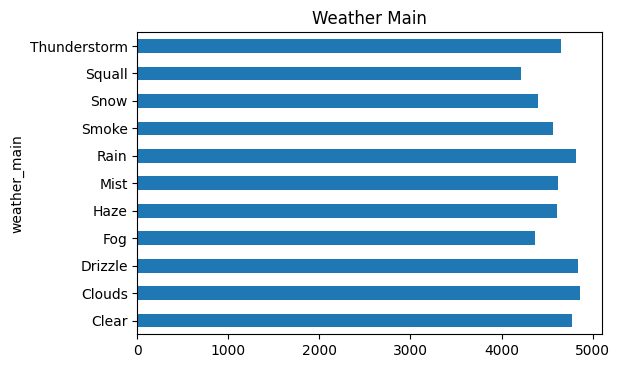

In [18]:
# we need to group the two columns
by_weather_main=day_time.groupby('weather_main').mean()
by_weather_description=day_time.groupby('weather_description').mean()

#plot1
by_weather_main['traffic_volume'].plot.barh()
plt.title('Weather Main')
plt.show()

The heavy indicators seem to be Cloud,Thunderstorm,Rain and Drizzle. Cloud seem to be the main reason for most of the heavy traffic than other indicators.

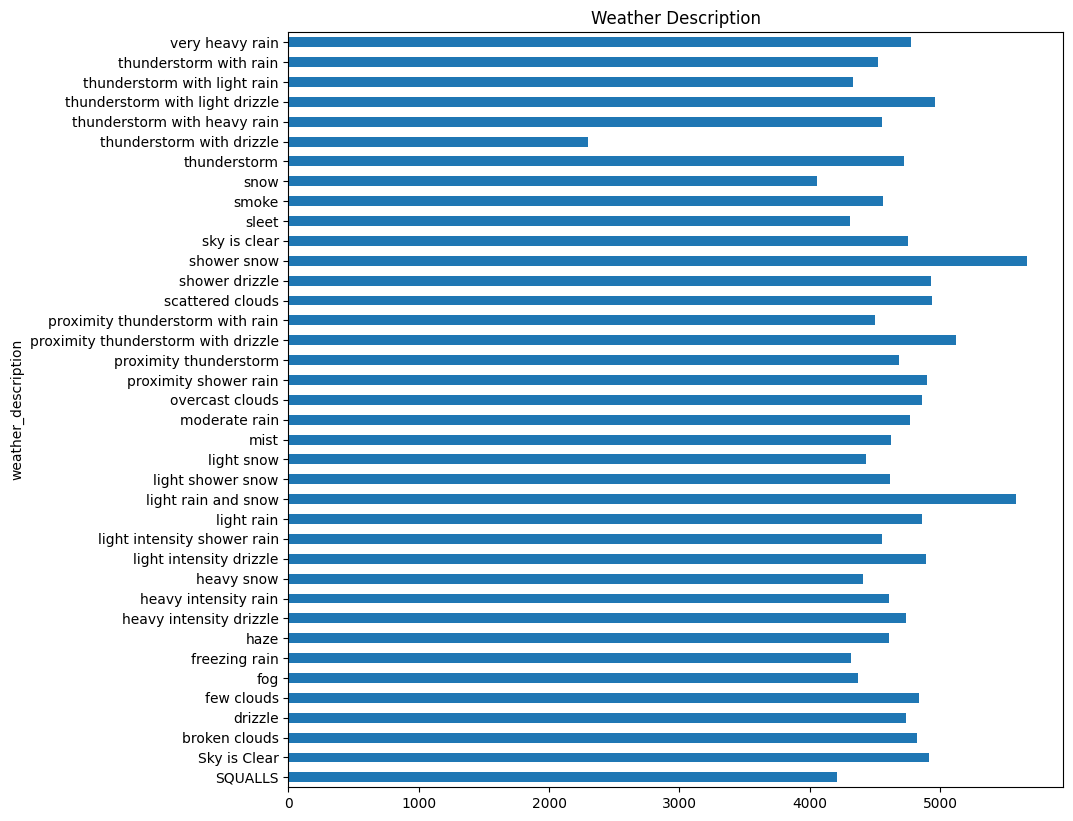

In [19]:
#plot2
plt.figure(figsize=(10,10))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Weather Description')
plt.show()

There are three indicators in which traffic volume is exceeding 5000 cars. They are
- Light rain and snow
- Shower snow
- Proximity thunderstorms with drizzle

# Conclusion of the project:-

In this project, the goal was to find out heavy traffic indicators on I-94 highway. Throughout the analysis and visualization, we found out that:-
- Heavy traffic occurs during daytime as compared to night-time(which is very less).
- Heavy traffic is more during the warm months as compared to the colder months, with July having the most frequency.
- Heavy traffic is more during business days as compared to weekends
- The rush hours leading to heavy traffic were typically between 7 am to 4 pm.
- Weather also played as a significant indicator in heavy traffic, with 'Cloud' being the top reason for the same. The weather indicators are:-
1. Light rain and snow
2. Shower snow
3. Proximity thunderstorms with drizzle

          X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X